In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import albumentations as A
from PIL import Image

def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 5

    for i in range(1, len(images)):
        if bboxes is not None:
            img = visualize_bbox(images[i - 1], bboxes[i - 1], class_name="Elon")
        else:
            img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()


# From https://albumentations.ai/docs/examples/example_bboxes/
def visualize_bbox(img, bbox, class_name, color=(255, 0, 0), thickness=5):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    return img

In [5]:
%%time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
CPU times: user 1.15 s, sys: 223 ms, total: 1.37 s
Wall time: 25 s


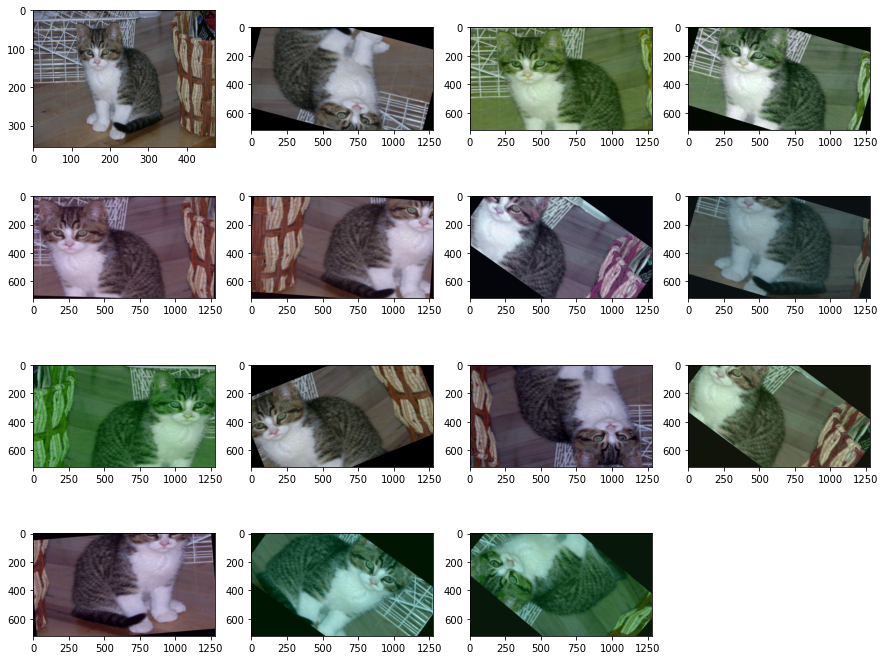

In [7]:
classification_image = Image.open("/content/drive/MyDrive/Colab Notebooks/ithome/albumentations/cat_class.jpg")

classification_trans = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0),
    ]
)

images_list = [classification_image]
image = np.array(classification_image)
for i in range(15):
    augmentations = classification_trans(image=image)
    augmented_img = augmentations["image"]
    images_list.append(augmented_img)
plot_examples(images_list)

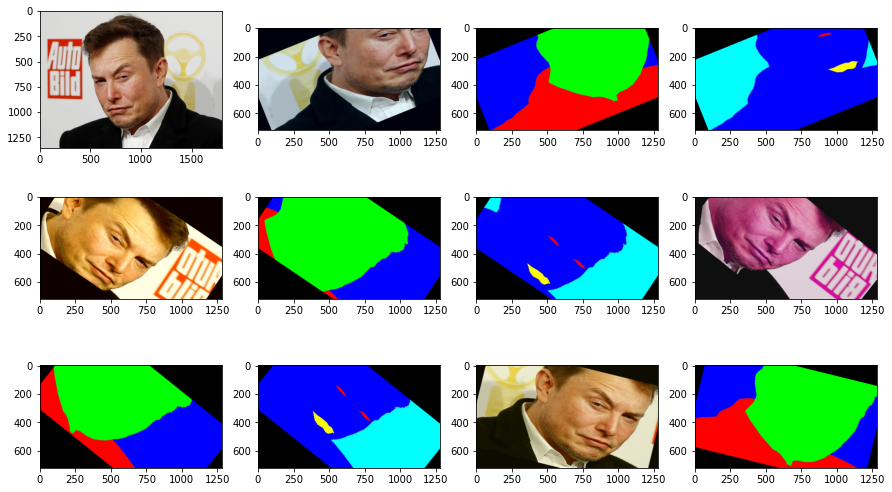

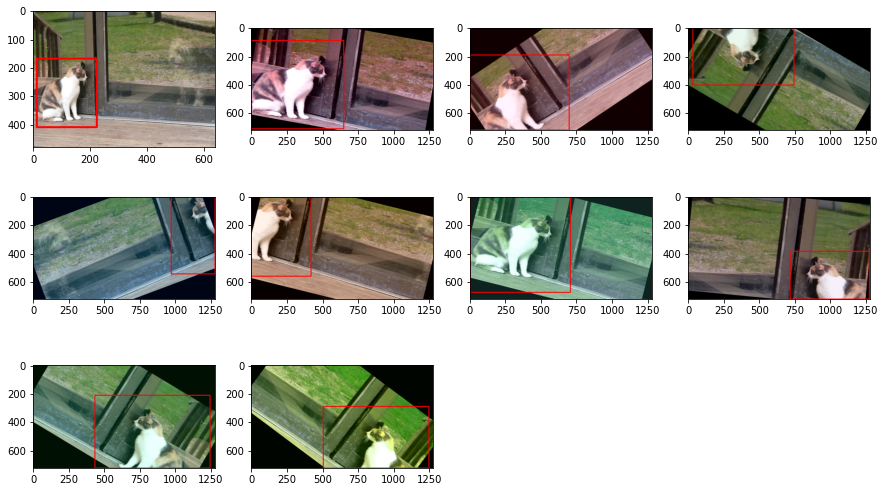

In [12]:
cv2_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ithome/albumentations/cat_object.jpg")
cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
bboxes = [[13, 170, 224, 410]]

# Pascal_voc (x_min, y_min, x_max, y_max), YOLO, COCO

transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0),
    ], bbox_params=A.BboxParams(format="pascal_voc", min_area=2048,
                                min_visibility=0.3, label_fields=[])
)

images_list = [cv2_image]
saved_bboxes = [bboxes[0]]
for i in range(15):
    augmentations = transform(image=cv2_image, bboxes=bboxes)
    augmented_img = augmentations["image"]

    if len(augmentations["bboxes"]) == 0:
        continue

    images_list.append(augmented_img)
    saved_bboxes.append(augmentations["bboxes"][0])

plot_examples(images_list, saved_bboxes)